<a href="https://colab.research.google.com/github/GildasTaliah/Solutions_with_PyNoteBook/blob/main/Intro_MathOptimz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRO TO MATHEMATICAL OPTIMIZATION IN PYTHON**



**Description**

This course transforms beginners into skilled optimizers, teaching you to convert and solve real-world problems using mathematical modeling in Python with SciPy and PuLP. Starting with the basics of optimization and its applications, you'll employ SymPy for analytical solutions without manually calculating derivatives, and utilize SciPy for numerical answers. You'll progress to tackling linear programming, constrained convex optimization, and mixed integer optimization with SciPy and PuLP, focusing on practical issues like manufacturing, profit maximization, and resource allocation.

# 1. **Introduction to Optimz**
This chapter introduces optimization, its core components, and its wide applications across industries and domains. It presents a quick, exhaustive search method for solving an optimization problem. It provides a mathematical primer for the concepts required for this course.

Applying an objective function
You work for a media company and are faced with the problem of minimizing the cost to print and distribute magazines. You want to find the optimal number of magazines to publish and print for the smallest cost.

In your organization, the costs associated with a number of magazines printed is calculated using the following equation:

C = 50 + 5 (q -2)^2

The costs C and quantity of magazines q are in thousands, so the 50 represents $50,000, the fixed costs of your business, such as paying the rent on the building.

numpy and matplotlib.pyplot have been imported for you as np and plt, respectively.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

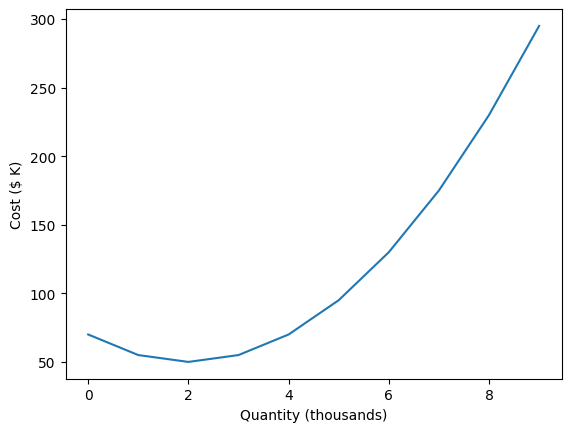

In [ ]:
# Create an array of integers from 0 to 10
quantity = np.arange(10)

# Define the cost function
def cost(q):
  return 50 + 5*(q - 2)**2

# Plot cost versus quantity
plt.plot(quantity, cost(quantity))
plt.xlabel('Quantity (thousands)')
plt.ylabel('Cost ($ K)')
plt.show()
# That's correct! The lowest cost of $50,000 achieved with 2000 magazines.

**Exhaustive search method**

You've applied the objective function and visualized the result; however, you could only eye-ball the optimal value by reviewing the plot. A more precise way of finding this value is with the exhaustive search method.

You're again working for a media company that publishes and prints magazines, but this time, you'll discover how to maximize profit rather than minimize cost. Recall that the profit and quantity units are in the thousands, so a q of 1 is 1000 magazines and a profit of 5 is $5000.

P = 40q - 0.5q^2

The same quantity array from the previous exercise has been provided for you, along with a profit() function to optimize.

numpy has been imported for you as np.

In [ ]:
# Calculate the profit for every quantity
quantity = np.arange(80)

def profit(q):
  return 40*q - 0.5*q**2
profits = profit(quantity)

# Find the maximum profit
max_profit = profits.max()

# Find the optimal quantity
max_profit_ind = np.argmax(profits)
optimal_quantity = quantity[max_profit_ind]

# Print the results
print(f"You need to print {optimal_quantity * 1000} magazines to make the maximum profit of ${max_profit * 1000}.")

#Great work! The exhaustive search worked well for the problem, and informs the media company that they'll need to sell 4000 magazines to optimize profit.

You need to print 40000 magazines to make the maximum profit of $800000.0.


**Finding the derivative**

For some objective functions, the optimum can be found using calculus by finding the derivative of the function. sympy offers a solution to avoid manually calculating these derivatives. Suppose you work in a firm that produces toy bicycles. You have the following objective function to calculate your costs, C, which is dependent on the variable, q, the quantity of bicycles produced:

C = 2000 - q2 + 120 q

To find the optimum value of q , you'll find the derivative of the cost with respect to the quantity, dCdq, using sympy. symbols, diff, and solve have been loaded for you in this and the next exercise.

In [ ]:
import sympy
from sympy import symbols, diff, solve

# Convert q into a symbol
q = symbols('q')
c = 2000 - q**2 + 120 * q

# Find the derivative of the objective function
dc_dq = diff(c)
print(f"The derivative is {dc_dq}.")

# Solve the derivative
q_opt = solve(dc_dq)
print(f"Optimum quantity: {q_opt}")

#Excellent! The derivative is 120-2.0*q, and the slope is at zero when the quantity is 60, making that your optimum quantity!

The derivative is 120 - 2*q.
Optimum quantity: [60]


**Find the second derivative**

Now that you have the derivative of your objective function, you can calculate the second order derivative. You'll do so symbolically using sympy.

The values for dc_dq and q_opt, and the objective function c with the quantity variable q from the previous exercise are available to you.

In [ ]:
# Find the second derivative
d2c_dq2 = diff(dc_dq)
print(np.array(np.array(q_opt).astype(int)))

# Substitute the optimum into the second derivative
q_opt = q_opt[0]
sol = d2c_dq2.subs(q, q_opt)
print(f"The 2nd derivative at q_opt is: {sol}")
# We have a maxima

[60]
The 2nd derivative at q_opt is: -2


**Partial derivatives with SymPy**
You are an economist working for an automotive company. Your manager has modeled the production process as a function of the number of machines
K and the number of workers L to produce

F = - 3K2 + 100K - 1/2L^2 + 100L cars.

This is your multivariate objective function. You'll need to use partial derivatives to optimize this function.

symbols, diff, and solve have been loaded for you.

In [ ]:
# Define symbols K, L
K, L = symbols('K L')

F = -3*K**2 + 100* K - (1/2)*L**2 + 100*L

# Derive the partial derivatives
dF_dK = diff(F, K)
dF_dL = diff(F, L)

# Solve the equations
crit_points = solve([dF_dK, dF_dL], (K, L))
print(crit_points)

""" Excellent coding! You found a critical point at K of 16hrs 40min and an \
L of 100hrs—this could be the function's optimum! To be sure, y\
ou should visualize the function and look out for a special cases where differentiation breaks down. Let's test your knowledge of these cases! """

{K: 16.6666666666667, L: 100.000000000000}


" Excellent coding! You found a critical point at K of 16hrs 40min and an L of 100hrs—this could be the function's optimum! To be sure, you should visualize the function and look out for a special cases where differentiation breaks down. Let's test your knowledge of these cases! "

**Limitations of differentiation**

Differentiation can be a good optimization tool for simpler objective functions, but there are a few things to look out for before applying it!

Can you identify objective functions that can be differentiated (are differentiable) and functions where differentiation won't succeed?

# Unconstrained and Linear Constrained Optimization

This chapter covers solving unconstrained and constrained optimization problems with differential calculus and SymPy, identifying potential pitfalls. SciPy is also introduced to solve unconstrained optimization problems, in single and multiple dimensions, numerically, with a few lines of code. The chapter goes on to solve linear programming in SciPy and PuLP.



**Finding the maxima**

Unconstrained optimization is finding the maxima or minima of a function that does not have any constraints or restrictions on the input variables.

Suppose you are launching a new product in your delicious cookie company and you want to maximize the revenue. The revenue can be modeled with this objective function where R is the revenue generated at price x.

R = -(x^2) + 3*x - 5

Solve this maximization problem using SciPys minimize_scalar() which has been loaded for you.

In [ ]:
from scipy.optimize import minimize_scalar


# Define the new objective function
def negated_function(x):
  return (x**2 - 3*x + 5)

# Maximize the negated function
result = minimize_scalar(negated_function)

# Print the result
print(f"The maximum is {result.x:.2f} in two decimals")

""" Great work maximizing using minimize_scalar(). The result says the cookies should be priced at $1.50 to maximize revenue. """


The maximum is 1.50 in two decimals


' Great work maximizing using minimize_scalar(). The result says the cookies should be priced at $1.50 to maximize revenue. '

**Multivariate optimization**

Great job maximizing that revenue! You now want to look at minimizing costs.

You'll need to consider two variables for your new cookie product, the sugar ingredient (a[0]) and the flour ingredient (a[1]). This is a multivariate optimization problem where you want to find the best way to mix these ingredients so that your cookies are delicious but not too expensive!

SciPy's minimize() function has been loaded for you and the objective function has been provided.

In [ ]:
from scipy.optimize import minimize

def objective_function(a):
  return (a[0] - 2)**2 + (a[1] - 3)**2 + 3

# Save your initial guess
x0 = [1, 2]

# Calculate and print the minimum
result = minimize(objective_function, x0)
print(f"minimum is (x, y) = ({result.x[0]:.2f}, {result.x[1]:.2f}) in two decimals.")

""" Fantastic! You need 2 units of sugar and 3 units of flour to minimize costs while still having delicious cookies. """

minimum is (x, y) = (2.00, 3.00) in two decimals.


' Fantastic! You need 2 units of sugar and 3 units of flour to minimize costs while still having delicious cookies. '

**Note**: So far we have mostly been dealing with **bounds constraint optimization** with defaul solver **BFGS: Broyden Fletcher Goldharb Shanno**

**Working with Bounds**

Bound-constrained problems have variables that are limited to a range of values.

You're running a coffee shop and need to place an order for two varieties of coffee beans: b[0] and b[1]. You want to minimize costs. Your supplier only accepts minimum quantity orders of 2 units for each bean, and you can afford a maximum of 100 units per bean.

minimize and Bounds from scipy.optimize have been loaded for you and the objective function is provided.

In [ ]:
from scipy.optimize import minimize, Bounds

def objective_function(b):
  return (b[0] - 6)**2 + (b[1] - 8)**2 + 3

# Set the bounds of your problem
bounds = Bounds(2, 100)

# initial guess
x0 = [10, 5]

# Find the minimum
result = minimize(objective_function, x0, method = 'L-BFGS-B', bounds = bounds)

print(result.x)

""" Nice job working with those bounds. Your optimal order of coffee beans will be 6 units for the first type and 8 units for the second. """

[6.         7.99999999]


' Nice job working with those bounds. Your optimal order of coffee beans will be 6 units for the first type and 8 units for the second. '

**Handling hard inequalities**

Back in the coffee shop, you want to look at minimizing daily expenses. You have an objective function that calculates your production costs, and a constraint function that tells you the limits of how much coffee you can produce.

Apply scipy to find the optimal allocation of resources to minimize costs.

In [ ]:
def objective_function(b):
  return (b[0] - 5) ** 2 + (b[1] - 3) ** 3

def constraint_function(x):
    return 2*x[0] + 3*x[1] - 6

# Set the constraint variable
constraint = {'type': 'ineq',
              'fun': constraint_function}

x0 = [20, 20]

# Find the minimum
result = minimize(objective_function, x0,
         constraints=[constraint])

print(result)

""" Good work! It looks like you may need to make some reductions to your production schedule to minimize costs. """



 message: Inequality constraints incompatible
 success: False
  status: 4
     fun: -5596424370440672.0
       x: [ 2.665e+05 -1.775e+05]
     nit: 3
     jac: [ 0.000e+00  9.456e+10]
    nfev: 9
    njev: 3


' Good work! It looks like you may need to make some reductions to your production schedule to minimize costs. '

That's right! Linear programming requires both the objective function and the constraints to have a linear relationship.

**PuLP for linear optimization**

A farmer faces a diet problem for their cattle. The vet's recommendation is that each animal is fed at least 7 pounds of a mix of corn and soybean with at least 17% protein and 2% fat. Below are the relevant nutritional elements:

Food type: Corn and Syobean; Cost($/lb): 0.11 and 28; Protein(%): 10 and 40; Fat(%): 2.5 and 1.

You will use this information to minimize costs subject to nutritional constraints.

pulp has been imported for you.

In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 33.4 MB/s eta 0:00:00


In [ ]:
from pulp import *

# Define the model
model = LpProblem("MinCost", LpMinimize)

# Define the variables
C = LpVariable("C", lowBound=0)
S = LpVariable("S", lowBound=0)

# Add the objective function and constraints
model += 0.11*C + 0.28*S
model += 40*S + 10*C >= 17*(C+S), "M_protein"
model += S + 2.5*C >= 2*(C+S), "M_fat"
model += C + S >= 7, "M_weight"

# Solve the model
model.solve()
print(f"Cost = {value(model.objective):.2f}")
print(f"Pounds of soybean = {S.varValue:.2f}, pounds of corn = {C.varValue:.2f}")

""" That was superb! Piecing together the objective functions and constraints can be tricky but you did it and successfully minimized the cost for the farmer. """

Cost = 1.05
Pounds of soybean = 1.63, pounds of corn = 5.37


' That was superb! Piecing together the objective functions and constraints can be tricky but you did it and successfully minimized the cost for the farmer. '

**Handling multiple elements**

The farmer wants to replicate the previous optimization function to detail with more complicated meals for other animals on the farm.

The previous code has been provided. Can you adjust the previous code to make it better at handling multiple variables?

pulp has been imported for you.

In [ ]:
model = LpProblem("MinCost", LpMinimize)

# Adjust the variable definition
variables = LpVariable.dicts("Food", ['C', 'S'], lowBound=0)

# Adjust the objective function
cost = {'C': 0.11, 'S': 0.28}
model += lpSum([cost[i] * variables[i] for i in ['C', 'S']])

model += 40*variables['S'] + 10*variables['C'] >= 17*(variables['C']+variables['S']), "M_protein"
model += variables['S'] + 2.5*variables['C'] >= 2*(variables['C']+variables['S']), "M_fat"
model += variables['C'] + variables['S'] >= 7, "M_weight"

model.solve()
print(f"Cost = {value(model.objective):.2f}")
print(f"Pounds of soybean = {variables['S'].varValue:.2f}, pounds of corn = {variables['C'].varValue:.2f}")

""" Good job, Gut Arbeit, Gut gemacht! """

Cost = 1.05
Pounds of soybean = 1.63, pounds of corn = 5.37


' Good job, Gut Arbeit, Gut gemacht! '

# Non-Linear Constraint Optimization

This chapter introduces **convex-constrained optimization** problems with different constraints and looks at mixed integer linear programming problems, essentially linear programming problems where at least one variable is an integer.

**Interpreting indifference curves**

In convex optimization, you can interpret the indifference curve and constraint to understand the optimization problem.

What should you look for when interpreting these visualizations? Select the two true statements.

- The point on the indifference curve that minimizes or maximizes the objective function
- The single point where the constraint line and indifference curve touch

**Visualize the indifference curve**

You have been provided the following utility function and constraint.

U (c,m) = c^0.7 *  m^0.3

s.t:  c + m = 2

Use this to visualize the indifference curve.

np and plt have been loaded for you.

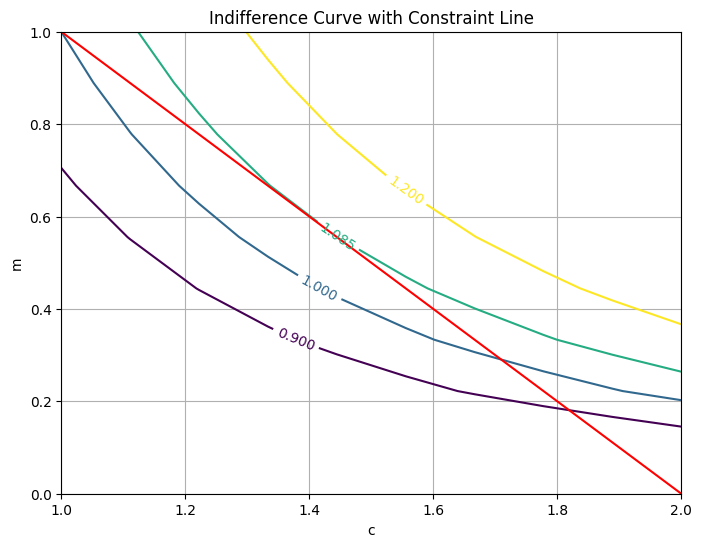

" Excellent work! By looking at this graph, it looks like our solution may be around c of 1.4 and m of 0.6. Let's see if that's correct! "

In [ ]:
c = np.linspace(1, 2, 10)
# Define the constraint and generate combinations
m = 2 - c

# create combination pairs of c and m.
C, M = np.meshgrid(c, m)
# Define the utility function
F = C**0.7 * M**0.3

plt.figure(figsize=(8, 6))
# Plot the controls and constraints
contours = plt.contour(C, M, F, levels=[0.9, 1.00, 1.085, 1.2])
plt.clabel(contours)
plt.plot(c, m, color='red')
plt.title('Indifference Curve with Constraint Line')
plt.xlabel('c')
plt.ylabel('m')
plt.grid(True)
plt.show()

""" Excellent work! By looking at this graph, it looks like our solution may be around c of 1.4 and m of 0.6. Let's see if that's correct! """

**Utility maximization**

Bill is an aspiring piano student who allocates hours of study in classical **c** and modern **m** music. His preferences are represented by the same utility function you just plotted:

U (c,m) = c^0.7 *  m^0.3.

Hours of study sum up to 2. i.e (c + m = 2) daily. Help Bill find the optimal studying plan.

np and minimize have been loaded for you. We have already imported symbols, diff and solve from SymPy, defined c and m as symbols and defined the Utility function U for you.

In [ ]:
# Define the utility function
def utility_function(vars):
    c, m = vars
    return -(c**.7 * m**.3)

# Define the constraint function
def constraint(vars):
    return 2 - np.sum(vars)

initial_guess = [12, 12]

# Set up the constraint
constraint_definition = {'type': 'eq', 'fun': constraint}

# Perform optimization
result = minimize(utility_function, initial_guess, constraints=constraint_definition)
c, m = result.x

print("Optimal study hours for classical music:", round(c, 2))
print("Optimal study hours for modern music:", round(m, 2))

""" Well done! It looks like Bill should spend around 1.4 hours on classical music and around 0.6 hours on modern music. You did a great job visualizing and optimizing. """

Optimal study hours for classical music: 1.4
Optimal study hours for modern music: 0.6


' Well done! It looks like Bill should spend around 1.4 hours on classical music and around 0.6 hours on modern music. You did a great job visualizing and optimizing. '

**Interior or corner?**

Select the correct definition for interior and corner solution.


- A corner solution has an intersection of two constraints, while an interior solution does not
- Correct! A corner solution shows the intersection of two constraints while an interior solution is where the constraint touches the curve.

**Linear constrained biscuits**

Congratulations! Your biscuit business has expanded. You now have two bakeries, **A** and **B**, to help you deliver your biscuits nationwide. Your bakeries can each make 100 biscuits a day and the cost of making a biscuit in bakery A is 1.5 the quantity q while in bakery B it is 1.75 q.

Price is defined by 150 − q.

Your business is booming and you already have 140 biscuit pre-orders for the day. You want to maximize your profit for the day. How many biscuits should you make in each bakery?

minimize, Bounds, and LinearConstraint have been loaded for you and the revenue function R is already defined.





In [ ]:
from scipy.optimize import minimize, Bounds, LinearConstraint

def R(q):
    return (150 - q[0] - q[1]) * (q[0] + q[1])

# Define the cost function
def C(q):
  return 1.5*q[0] + 1.75*q[1]

# Define the profit function
def profit(q):
  return R(q) - C(q)

# Define the bounds and constraints
bounds = Bounds([0, 0], [100, 100])
constraints = LinearConstraint([1, 1], lb=140)

# Perform optimization
result = minimize(lambda q: -profit(q),
                  [50, 50],
                  bounds=bounds,
                  constraints=constraints)

print(result.message)
print(f'The optimal number of biscuits to bake in bakery A is: {result.x[0]:.2f}')
print(f'The optimal number of biscuits to bake in bakery A is: {result.x[1]:.2f}')
print(f'The bakery company made: ${-result.fun:.2f}')

""" Brilliant baking! You need to make 100 biscuits in factory A and 40 in factory B to maximize on profit. """

Optimization terminated successfully
The optimal number of biscuits to bake in bakery A is: 100.00
The optimal number of biscuits to bake in bakery A is: 40.00
The bakery company made: $1180.00


' Brilliant baking! You need to make 100 biscuits in factory A and 40 in factory B to maximize on profit. '

**Nonlinear constrained biscuits**

That was some excellent baking!

Now can you solve the same problem again using NonlinearConstraint?

Recall the constraint for the bakeries is they need to fulfill a minimum of 140 pre-orders and each factory can make 100 biscuits daily.

minimize, Bounds, and NonlinearConstraint have been loaded for you as well as the revenue function R, cost function C, and profit function profit.

In [ ]:

from scipy.optimize import minimize, Bounds, NonlinearConstraint

# Redefine the problem with NonlinearConstraint
constraints = NonlinearConstraint(lambda q: q[0] + q[1], lb=140, ub=np.Inf)

# Perform optimization
result = minimize(lambda q: -profit(q),
                  [50, 50],
                  bounds=Bounds([0, 0], [100, 100]),
                  constraints=constraints)

print(result.message)
print(f'The optimal number of biscuits to bake in bakery A is: {result.x[0]:.2f}')
print(f'The optimal number of biscuits to bake in bakery A is: {result.x[1]:.2f}')
print(f'The bakery company made: ${-result.fun:.2f}')

""" Fantastic work! This problem is pretty straightforward, but remember you can use NonlinearConstraint if the problem is not as neat. """

Optimization terminated successfully
The optimal number of biscuits to bake in bakery A is: 100.00
The optimal number of biscuits to bake in bakery A is: 40.00
The bakery company made: $1180.00


' Fantastic work! This problem is pretty straightforward, but remember you can use NonlinearConstraint if the problem is not as neat. '

**Adjusting MILP**

The gown and tuxedo firm have adjusted some aspects of their business and need you to optimize for profit based on the new structure.

The profit formula was 545g + 330t, where g are the gowns, and t are the tuxedos. The constraints are the same: 6g + 4t <= 40,

3g + t <= 20

The firm wants to increase their tuxedo profit by 10%, and Mr. S can now only work 30 hours per week.

milp, LinearConstraint and Bounds have been loaded for you.

In [ ]:
#from pulp import *
from scipy.optimize import milp, LinearConstraint, Bounds

# Adjust the objective
result = milp([-545, -363],
              integrality=[1, 1],
              bounds=Bounds([0, 0], [20, 12]),
              constraints=LinearConstraint([[6, 4], [3, 1]], ub=[40, 20]))

print(result.message)
print(f'The optimal number of gowns produced is: {result.x[0]:.2f}')
print(f'The optimal number of tuxedos produced is: {result.x[1]:.2f}')
print(f'The firm made: ${-result.fun:.2f}')

Optimization terminated successfully. (HiGHS Status 7: Optimal)
The optimal number of gowns produced is: 6.00
The optimal number of tuxedos produced is: 1.00
The firm made: $3633.00


In [ ]:
# Adjust the objective
result = milp([-545, -363],
              integrality=[1, 1],
              bounds=Bounds([0, 0], [20, 12]),
# Change Ms. Souster's constraint limit
              constraints=LinearConstraint([[6, 4], [3, 1]], ub=[30, 20]))

print(result.message)
print(f'The optimal number of gowns produced is: {result.x[0]:.2f}')
print(f'The optimal number of tuxedos produced is: {result.x[1]:.2f}')
print(f'The firm made: ${-result.fun:.2f}')

""" Well done! You changed objective and constraints properly. It looks like the change to \
Mr. S's hours combined with the new tuxedo goal is a bad match, since the optimal number of tuxedos is 0. """

Optimization terminated successfully. (HiGHS Status 7: Optimal)
The optimal number of gowns produced is: 5.00
The optimal number of tuxedos produced is: -0.00
The firm made: $2725.00


" Well done! You changed objective and constraints properly. It looks like the change to Mr. S's hours combined with the new tuxedo goal is a bad match, since the optimal number of tuxedos is 0. "

**Understanding integrality**

The integrality argument of the milp() function ensures that the variables in the objective function are treated as integers, or discrete variables.

What is a consequence of omitting this argument when performing optimization?

- The solution may violate the variable constraints or underestimate the optimum values

- Correct! The integrality argument makes sure that we are correctly interpreting variables as discrete variables and therefore enforcing constraints correctly.

# Robust Optimization Technique

This chapter covers finding the global optimum when multiple good solutions exist. We will conduct sensitivity analysis and learn linearization techniques that reduce non-linear problems to easily solvable ones with SciPy or PuLP. In terms of applications, we will solve an HR allocation with training costs problem and capital budgeting with dependent projects.

**Solving the capital budgeting problem
Recall the capital budgeting problem.

Your manager designs the firm's strategy and considers projects
A
,
B
,
C
, and
A
 is the prerequisite for
B
. Profits are respectively
V
=
[
250
,
200
,
300
]
, the required investment is I = [2000, 1900, 2500] and only $4600 is available.
o
 is a binary variable of whether a project is selected.

Your manager gave you the problem:

max


o
A
V
A
+
o
A
B
V
B
+
o
C
V
C

s
.
t
.

o
A
I
A
+
o
A
B
I
B
+
o
C
I
C
≤
4600

Your task is to linearize and solve the profit problem.

We have already imported pulp and defined a model with the parameters V, I, names for the project names (A, B, C, and AB indexed in that order), and o representing the binary decision using the same indexing.

**Solving the Capital Budgeting Problem**

Recall the capital budgeting problem where your manager designs the firm's strategy and considers projects A, B, and C. Project A is a prerequisite for project B.

Profits are V = [250, 200, 300].
Required investments are I = [2000, 1900, 2500].
The available budget is $4600.
o is a binary variable representing whether a project is selected.

The manager has given you the following problem:

Maximize o_A * V_A + o_B * V_B + o_C * V_C

Subject to o_A * I_A + o_B * I_B + o_C * I_C ≤ 4600

Your task is to linearize and solve the problem using pulp. Below is the code to set up the linear programming (LP) model:


In [ ]:
import pulp

# Define the profits and investment requirements
V = [250, 200, 300]   # Profits for A, B, C
I = [2000, 1900, 2500] # Investments for A, B, C


# Define the objective
o = {0: o_0, 1: o_1, 2: o_2, 3: o_3}
model += o[0]*V[0] + o[3]*V[1] + o[2]*V[2]

# Define the constraints
model += o[0]*I[0] + o[3]*I[1] + o[2]*I[2] <= 4600, 'budget constraint'
model += o[3] <= o[0]
model += o[3] <= o[1]
model += o[3] >= o[0] + o[1] - 1

status = model.solve()
print(f"{'Optimal found' if status == 1 else 'Ignore solution'}")

for i, name in enumerate(names):
    print(f"{name}: {'accepted' if o[i].varValue == 1 else 'rejected'}")
print(f'Total profit = ${value(model.objective)}')



NameError: name 'o_0' is not defined

In [ ]:
import pulp

# Define profits and investments
V = [250, 200, 300]   # Profits for A, B, C
I = [2000, 1900, 2500] # Investments for A, B, C

# Project names
names = ["A", "AB", "C"]

# Initialize the LP problem
model = pulp.LpProblem("Capital_Budgeting", pulp.LpMaximize)

# Define binary decision variables for selecting projects A, B, and C
o = [pulp.LpVariable(f"o_{name}", cat='Binary') for name in names]

# Define the objective: maximize the total profit
model += o[0] * V[0] + o[1] * V[1] + o[2] * V[2], "Total_Profit"

# Define the constraints
model += o[0] * I[0] + o[1] * I[1] + o[2] * I[2] <= 4600, 'Budget_Constraint'
model += o[1] <= o[0], "Prerequisite_Constraint_B_A"  # B can only be selected if A is selected

# Solve the problem
status = model.solve()

# Print the status of the solution
print(f"{'Optimal found' if status == 1 else 'Ignore solution'}")

# Output results: whether each project is accepted or rejected
for i, name in enumerate(names):
    print(f"Project {name}: {'accepted' if o[i].varValue == 1 else 'rejected'}")

# Output the total profit
print(f"Total profit = ${pulp.value(model.objective)}")
""" Excellent! Projects A and C are selected, but there isn't enough budget to pick up B as well even if we have completed the prerequisite. """

Optimal found
Project A: accepted
Project AB: rejected
Project C: accepted
Total profit = $550.0


**Allocating Resources**

Nice work, time to solve the next problem you were introduced to.

A manager allocates 120 tasks to a senior (S), a junior (J), and an intern (I) software engineer and wants to minimize costs.

The intern requires training that costs $500 prior to working on the tasks. The cost to resolve each task is c = [30, 40, 5] respectively.

x holds the number of assigned tasks, and o is the binary variable for whether the intern receives training. The total cost is:

TC = 30 * x_S + 40 * x_J + (5 * x_I + 500) * o

Use the BigM method to linearize this problem using the new variable z:

z = (5 * x_I + 500) * o

-o * M ≤ z ≤ o * M

-(1 - o) * M ≤ z - (5 * x_I + 500) * o ≤ (1 - o) * M

pulp, along with a model, parameters c, M, and names, and variables x, z, o have already been imported for you.


In [ ]:
import pulp

# Define the costs per task for Senior (S), Junior (J), and Intern (I)
c = [30, 40, 5]  # Cost per task for S, J, and I
M = 10000  # A large number for BigM method
names = ["Senior", "Junior", "Intern"]

# Initialize the model
model = pulp.LpProblem("Task_Allocation", pulp.LpMinimize)

# Define decision variables
x = [pulp.LpVariable(f"x_{names[i]}", lowBound=0, cat='Continuous') for i in range(3)]  # Tasks assigned to each
o = pulp.LpVariable("o_Intern", cat='Binary')  # Binary variable for Intern training
z = pulp.LpVariable("z", lowBound=0, cat='Continuous')  # Cost variable for intern

# Define the objective function (minimize total cost)
model += c[0] * x[0] + c[1] * x[1] + z, "Total_Cost"

# Define the constraints for BigM method and task distribution
model += -o * M <= z, "BigM_lower_bound"
model += z <= o * M, "BigM_upper_bound"
model += -(1 - o) * M <= z - (c[2] * x[2] + 500), "BigM_constraint_lower"
model += z - (c[2] * x[2] + 500) <= (1 - o) * M, "BigM_constraint_upper"
model += pulp.lpSum(x) == 120, "Total_Tasks"

# Solve the model
status = model.solve()

# Output the results
print(f"{'Optimal found' if status == 1 else 'Ignore solution'}")

for i in range(len(c)):
    print(f"{names[i]} was assigned {x[i].varValue:.0f} tasks")

print(f"Total cost = ${pulp.value(model.objective):.2f}")
""" Great job! You now know how to use BigM to deal with product terms of binary * continuous variables. """

Optimal found
Senior was assigned 0 tasks
Junior was assigned 0 tasks
Intern was assigned 120 tasks
Total cost = $0.00


**Find the global optimum**

You've been provided with the following profit maximization problem and are tasked with finding the global maximum.

Π = - (1/4) * q^4 + 11 * q^3 - 160 * q^2 + 900 * q

0 is a natural lower bound for quantity, and you observed that at q = 30, profit is negative, so 30 is a good candidate for an upper bound.

Find the global optimum for this problem.

basinhopping has been imported for you.


In [ ]:
from scipy.optimize import basinhopping
def profit(q):
	return -q**4 / 4 + 11 * q**3 - 160 * q**2 + 900 * q

x0 = 0

# Define the keyword arguments for bounds
kwargs = {"bounds": [(0, 30)]}

# Run basinhopping to find the optimal quantity
result = basinhopping(lambda q: -profit(q), x0, minimizer_kwargs=kwargs)

print(f"{result.message}")
print(f"The maximum according to basinhopping(x0={x0}) is at {result.x[0]:.2f}\n")

""" Perfect! The global maximum is 18. """
" Perfect! The global maximum is 18. "

['requested number of basinhopping iterations completed successfully']
The maximum according to basinhopping(x0=0) is at 18.00



' Perfect! The global maximum is 18. '

**Using callback**

You want to find the two highest maxima of a profit function and you have decided to use callback to collect the optima found and then select the top two values.

First, you will complete the callback function. You will check if the value of the objective currently examined by basinhopping is accepted as optimum, and if so, you will append it to a list opt_values. Afterwards you will run basinhopping with the callback function you just defined.

basinhopping has been imported for you. The initial guess, x0, kwargs, and profit, function have already been defined for you.

In [ ]:
opt_values = []

def callback(x, f, accept):
# Check if the candidate is an optimum
    if accept:
# Append the value of the minimized objective to list opt_values
        opt_values.append(f)

# Run basinhopping to find top two maxima
result = basinhopping(lambda q: -profit(q), x0, callback=callback, minimizer_kwargs=kwargs, niter=5, seed=3)
top2 = sorted(list(set([round(f, 2) for f in opt_values])), reverse=True)[:2]
top2 = [-f for f in top2]

print(f"{result.message}\nThe highest two values are {top2}")

" Excellent! You have mastered using callback! Callback is very useful both to find many local optima and to debug if needed. The top values found here are 1718.75 and 2268.0. "

['requested number of basinhopping iterations completed successfully']
The highest two values are [2268.0]


' Excellent! You have mastered using callback! Callback is very useful both to find many local optima and to debug if needed. The top values found here are 1718.75 and 2268.0. '

**Slack and shadow price**

Which of the following accurately describes the concept of "slack" (as a noun) in linear programming?


- Slack denotes the amount added to the left-hand side of a constraint to make it binding
- That's right! Slack is indeed the amount added to the left-hand side of a constraint to make it binding.

**Shadow prices with juice**

A firm is employing two machines M1 and M2 to put grapefruit juice (g) and orange juice (o) in bottles. Its goal is to maximize profit subject to the constraints:

M1: 6g + 5.5o ≤ 40  
M2: 3g + 2.5o ≤ 20

The constraints reflect the productivity and availability of machines. For example, M1 is available for 40 hours per week and needs 6 hours to bottle 1 ton of grapefruit juice and 5.5 hours for a ton of orange juice.

There is an additional supply constraint where the firm only receives a maximum of 6 tons of grapefruit a week, and 12 tons of oranges. These are the upper bounds.

pulp has been imported for you and model has been defined as well as the variables g and o for grapefruit and orange juice.


In [ ]:
import pulp
from pulp import LpProblem, LpMaximize, LpVariable, LpStatus, value

# Define the model
model = LpProblem("Juice_Bottling", LpMaximize)

# Define the decision variables
g = LpVariable("Grapefruit_Juice", lowBound=0)  # Tons of grapefruit juice
o = LpVariable("Orange_Juice", lowBound=0)      # Tons of orange juice

# Define the objective function (profit maximization)
# Assuming profit per ton of grapefruit juice is $P1 and for orange juice is $P2
profit_per_g = 10  # Example profit for grapefruit juice
profit_per_o = 8   # Example profit for orange juice
model += profit_per_g * g + profit_per_o * o, "Total_Profit"

# Define the constraints
model += 6 * g + 5.5 * o <= 40, "Machine1_Capacity"  # M1 constraint
model += 3 * g + 2.5 * o <= 20, "Machine2_Capacity"  # M2 constraint
model += g <= 6, "Grapefruit_Supply"  # Supply constraint for grapefruit
model += o <= 12, "Orange_Supply"      # Supply constraint for orange

# Solve the model
status = model.solve()

# Print results
print(LpStatus[model.status])
print(f'The optimal amount of {g.name} embottled is: {g.varValue:.2f} tons')
print(f'The optimal amount of {o.name} embottled is: {o.varValue:.2f} tons')

# Print shadow prices and slacks for the constraints
for name, c in model.constraints.items():
    # Check if shadow value is positive
    if c.pi > 0:
        # Display the marginal increase in profit when the constraint is relaxed
        print(f"Increasing the capacity of {name} by one unit would increase profit by {c.pi:.2f} units.")
    else:
        # Display the slack, or unused capacity, of the constraint
        print(f"{name} has {c.slack:.2f} units of unused capacity.")

print("Excellent! You have mastered how to identify which constraint is most beneficial to relax and which is non-binding.")


Optimal
The optimal amount of Grapefruit_Juice embottled is: 6.00 tons
The optimal amount of Orange_Juice embottled is: 0.73 tons
Increasing the capacity of Machine1_Capacity by one unit would increase profit by 1.45 units.
Machine2_Capacity has 0.18 units of unused capacity.
Increasing the capacity of Grapefruit_Supply by one unit would increase profit by 1.27 units.
Orange_Supply has 11.27 units of unused capacity.
Excellent! You have mastered how to identify which constraint is most beneficial to relax and which is non-binding.


**The diet problem revisited**

You are reviewing the financials for a farmer who asked you to revisit the diet of his pigs and cut on the cost if possible. The current cost minimization diet is based on the vet's recommendation for at least 17% protein, 2% fat, 7lb food following specifications


You have the information that the 7 lb was a rounded figure and could decrease to 6.6 lb. You are asked to see how changing the weight or fat constraints one at a time affects the minimum cost. You will solve the original problem as is and examine the slack and shadow price.

pulp has been imported for you and model has been defined as well as the variables C and S for corn and soybean.

In [ ]:
import pulp
from pulp import LpProblem, LpMinimize, LpVariable, LpStatus, value

# Define the model
model = LpProblem("Diet_Problem_Revisited", LpMinimize)

# Define the decision variables
C = LpVariable("Corn", lowBound=0)  # Pounds of corn
S = LpVariable("Soybean", lowBound=0)  # Pounds of soybean

# Define the cost per pound
cost_per_corn = 0.1  # Example cost for corn per pound
cost_per_soybean = 0.2  # Example cost for soybean per pound

# Define the objective function (minimize cost)
model += cost_per_corn * C + cost_per_soybean * S, "Total_Cost"

# Define the constraints
model += C + S >= 7, "Weight"  # Original weight constraint
model += (0.17 * (C * 0.09 + S * 0.36)) >= 1, "Protein"  # Protein constraint (based on 17% protein)
model += (0.02 * (C * 0.02 + S * 0.01)) >= 0.12, "Fat"  # Fat constraint (based on 2% fat)

# Solve the model
model.solve()
print(f"Status: {LpStatus[model.status]}\n")

# Print the optimal solution
print(f"Optimal amount of Corn: {C.varValue:.2f} lbs")
print(f"Optimal amount of Soybean: {S.varValue:.2f} lbs")
print(f"Total cost: ${value(model.objective):.2f}\n")

# Print the slack of the weight constraint
print("The slack of the Weight constraint is: {:.2f}".format(model.constraints['Weight'].slack))

# Check if the shadow price is greater than 0
if model.constraints['Weight'].pi > 0:
    print('Tightening the constraint will increase minimum cost.')
else:
    print('Relaxing the constraint will not affect the minimum cost.')

print("\nWell done! You know how to retrieve the slack and the shadow value and most importantly you understand its significance and use!")


Status: Optimal

Optimal amount of Corn: 300.00 lbs
Optimal amount of Soybean: 0.00 lbs
Total cost: $30.00

The slack of the Weight constraint is: -293.00
Relaxing the constraint will not affect the minimum cost.

Well done! You know how to retrieve the slack and the shadow value and most importantly you understand its significance and use!


In [ ]:
# The End!!